### Initial cleaning

In [1]:
#Import relevant packages
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
movies = pd.read_csv('movies.csv')
movies.head(2)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy


In [3]:
ratings = pd.read_csv('ratings.csv')
ratings.head(2)

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247


In [4]:
#Will probably disregard this dataframe, doesn't seem as impactful.
tags = pd.read_csv('tags.csv')
tags.head(2)

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996


In [5]:
#Unique values in each dataframe
movies.nunique()

movieId    9742
title      9737
genres      951
dtype: int64

In [6]:
tags.nunique()

userId         58
movieId      1572
tag          1589
timestamp    3411
dtype: int64

In [7]:
ratings.nunique()

userId         610
movieId       9724
rating          10
timestamp    85043
dtype: int64

In [8]:
#Merge movies and ratings dataframes for easier reference.
df = pd.merge(ratings, movies, on='movieId', how='left')

In [9]:
df.head(2)

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance


In [10]:
#Drop 'timestamp' as this column is unnecessary
data = df.drop(['timestamp'], axis=1)

In [11]:
#Add a feature 'year' that shows which year the movie is from 
data['year'] = data['title'].str.extract('.*\((.*)\).*',expand = False)
data.head(5)

,userId,movieId,rating,title,genres,year
0,1,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
1,1,3,4.0,Grumpier Old Men (1995),Comedy|Romance,1995
2,1,6,4.0,Heat (1995),Action|Crime|Thriller,1995
3,1,47,5.0,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,1995
4,1,50,5.0,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,1995


Filtering the data frame to deal with sparsity and create a denser utility matrix

In [12]:
data = data.groupby('userId').filter(lambda x: len(x)>200)

In [13]:
data = data.groupby('movieId').filter(lambda x: len(x)>10)

In [14]:
#Check for NA values 
data.isna().sum()

userId     0
movieId    0
rating     0
title      0
genres     0
year       0
dtype: int64

In [15]:
#Drop any NA values 
data.dropna(inplace=True)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47232 entries, 0 to 100834
Data columns (total 6 columns):
userId     47232 non-null int64
movieId    47232 non-null int64
rating     47232 non-null float64
title      47232 non-null object
genres     47232 non-null object
year       47232 non-null object
dtypes: float64(1), int64(2), object(3)
memory usage: 2.5+ MB


In [17]:
#See which movie Ids have the highest number of views
data['movieId'].value_counts()

356     119
2571    113
260     111
1196    107
296     105
       ... 
6550     11
1515     11
4351     11
533      11
3564     11
Name: movieId, Length: 1717, dtype: int64

In [18]:
#See which users have provided the most ratings
data['userId'].value_counts()

414    1370
599    1171
68      997
474     901
448     894
       ... 
4       156
234     156
605     138
594     136
563      95
Name: userId, Length: 133, dtype: int64

In [19]:
#View the distribution of ratings 
data['rating'].value_counts()

4.0    12991
3.0     9065
3.5     6970
5.0     5598
4.5     4265
2.0     3239
2.5     2911
1.0     1030
1.5      716
0.5      447
Name: rating, dtype: int64

In [20]:
data.head()

,userId,movieId,rating,title,genres,year
0,1,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
1,1,3,4.0,Grumpier Old Men (1995),Comedy|Romance,1995
2,1,6,4.0,Heat (1995),Action|Crime|Thriller,1995
3,1,47,5.0,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,1995
4,1,50,5.0,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,1995


In [21]:
data['year'].value_counts()

2000    2405
1999    2357
1995    2198
2001    2142
1997    2039
        ... 
1938      13
1931      12
1947      12
1934      12
1922      11
Name: year, Length: 85, dtype: int64

In [22]:
data['year'].nunique()

85

/Users/MZhang/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


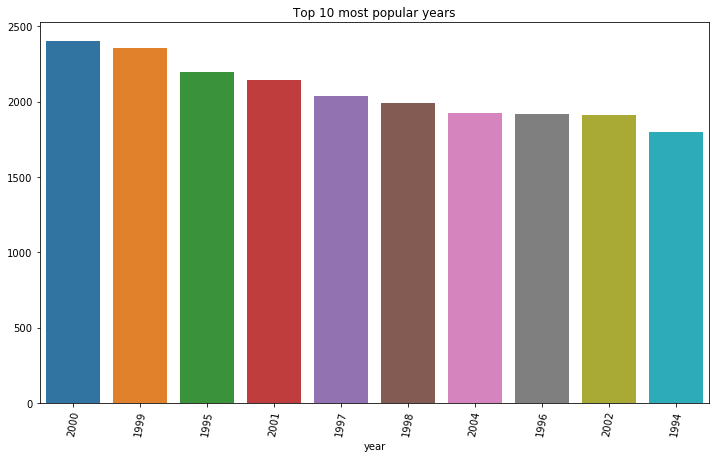

In [23]:
#Top 10 Years with the most movies produced.
plt.figure(figsize=(12,7))
topyear = data.groupby('year').size().sort_values(ascending=False).head(10)
sns.barplot(topyear.index, topyear.values)
plt.title('Top 10 most popular years')
plt.xticks(rotation=80);

In [27]:
#Print the average ratings of movies 
data.groupby('title').mean()['rating'].sort_values(ascending=False)

title
Double Indemnity (1944)                       4.590909
Paths of Glory (1957)                         4.545455
Ran (1985)                                    4.500000
Streetcar Named Desire, A (1951)              4.458333
Shawshank Redemption, The (1994)              4.457895
                                                ...   
Superman IV: The Quest for Peace (1987)       1.687500
Flintstones in Viva Rock Vegas, The (2000)    1.681818
Problem Child (1990)                          1.636364
Battlefield Earth (2000)                      1.571429
Speed 2: Cruise Control (1997)                1.535714
Name: rating, Length: 1717, dtype: float64

/Users/MZhang/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


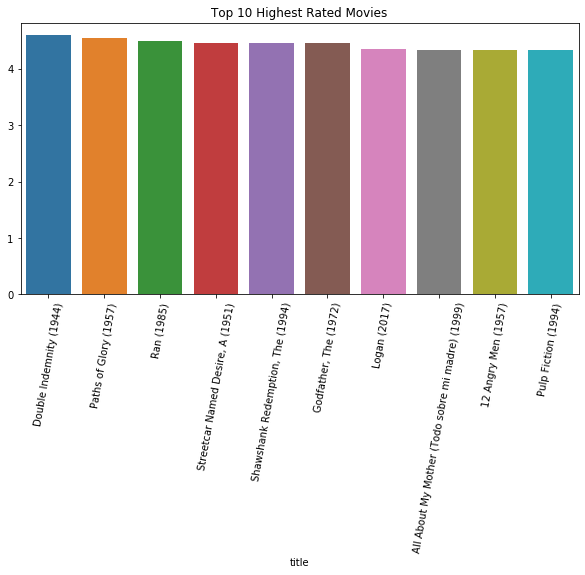

In [32]:
#Plot the top 10 highest rated movies
plt.figure(figsize=(10,5))
topmovies = data.groupby('title').mean()['rating'].sort_values(ascending=False).head(10)
sns.barplot(topmovies.index, topmovies.values)
plt.title('Top 10 Highest Rated Movies')
plt.xticks(rotation=80);

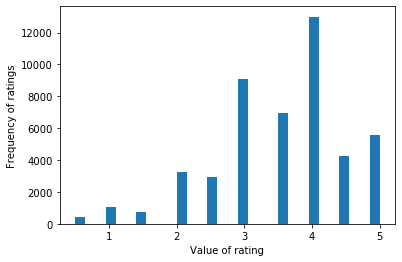

In [33]:
#Plot a histogram of the frequency of certain rating values
plt.hist(data['rating'],bins=30)
plt.xlabel('Value of rating')
plt.ylabel('Frequency of ratings')
plt.show()

In [29]:
# Look at how many times each movie has been watched
data.groupby('title').size().sort_values(ascending=False)

title
Forrest Gump (1994)                                                   119
Matrix, The (1999)                                                    113
Star Wars: Episode IV - A New Hope (1977)                             111
Star Wars: Episode V - The Empire Strikes Back (1980)                 107
Pulp Fiction (1994)                                                   105
                                                                     ... 
Around the World in 80 Days (1956)                                     11
Englishman Who Went Up a Hill But Came Down a Mountain, The (1995)     11
Enter the Dragon (1973)                                                11
Purple Rose of Cairo, The (1985)                                       11
Fantastic Beasts and Where to Find Them (2016)                         11
Length: 1717, dtype: int64

/Users/MZhang/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


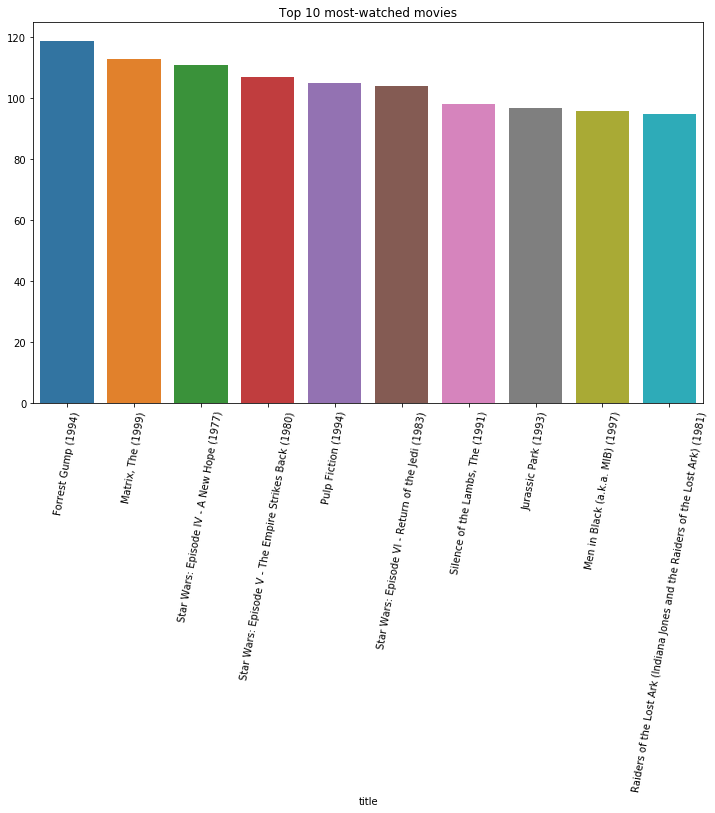

In [30]:
#Plot the top 10 most watched movies
plt.figure(figsize=(12,7))
topmovies = data.groupby('title').size().sort_values(ascending=False).head(10)
sns.barplot(topmovies.index, topmovies.values)
plt.title('Top 10 most-watched movies')
plt.xticks(rotation=80);

In [34]:
#Creat genre labels
genrelabels = set()
for i in data['genres'].str.split('|').values:
    genrelabels = genrelabels.union(set(i))

In [35]:
#Print genres
genrelabels

{'Action',
 'Adventure',
 'Animation',
 'Children',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'IMAX',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western'}

In [36]:
#Create function that counts how many movies there are of each genre 
def genrecounts(df, col, labels):
    count = dict()
    for i in labels: count[i] = 0
    for value in df[col].str.split('|'):
        if type(value) == float and pd.isnull(value): continue
        for i in value: 
            if pd.notnull(i): count[i] += 1
    return count                                       

In [37]:
genre_count = genrecounts(data, 'genres', genrelabels)
genre_count

{'Children': 4715,
 'Sci-Fi': 9700,
 'Comedy': 18932,
 'Horror': 3182,
 'Film-Noir': 467,
 'Thriller': 13128,
 'Romance': 8259,
 'Action': 16493,
 'Documentary': 192,
 'Mystery': 3846,
 'Crime': 8232,
 'Adventure': 13281,
 'Drama': 18015,
 'Animation': 3567,
 'IMAX': 2283,
 'Fantasy': 6509,
 'Musical': 2141,
 'War': 2132,
 'Western': 929}

In [38]:
genres = pd.DataFrame(list(genre_count.items()),columns = ['Genre','Frequency'])

In [39]:
genres = genres.sort_values(by=['Frequency'], ascending=False)

In [40]:
genres

,Genre,Frequency
2,Comedy,18932
12,Drama,18015
7,Action,16493
11,Adventure,13281
5,Thriller,13128
1,Sci-Fi,9700
6,Romance,8259
10,Crime,8232
15,Fantasy,6509
0,Children,4715


/Users/MZhang/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


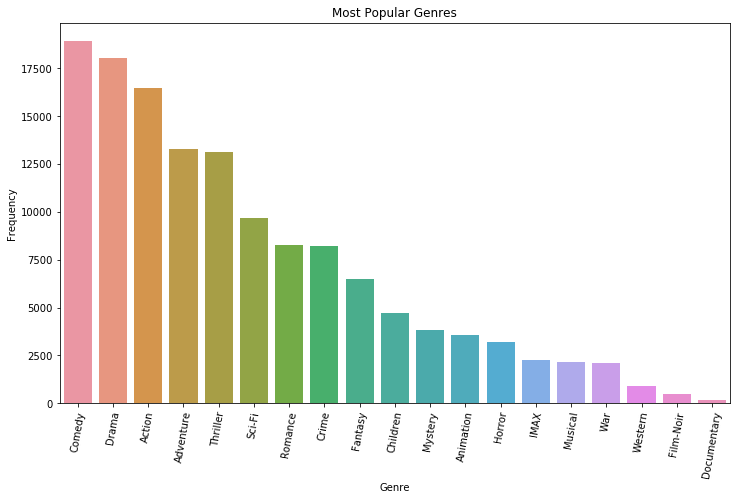

In [41]:
#Plot the top most watched movie genres
plt.figure(figsize=(12,7))
sns.barplot(genres['Genre'], genres['Frequency'])
plt.title('Most Popular Genres')
plt.xticks(rotation=80);

#### Additional EDA

In [42]:
data.head()

,userId,movieId,rating,title,genres,year
0,1,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
1,1,3,4.0,Grumpier Old Men (1995),Comedy|Romance,1995
2,1,6,4.0,Heat (1995),Action|Crime|Thriller,1995
3,1,47,5.0,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,1995
4,1,50,5.0,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,1995


In [43]:
#Create columns for each genre to indicate T/F
for genre in genrelabels:
    data[genre] = data['genres'].apply(lambda x: genre in x)

In [44]:
#Boolean values for each genre across every movie in the data frame.
pd.set_option('max_columns', None)
data.head(2)

,userId,movieId,rating,title,genres,year,Children,Sci-Fi,Comedy,Horror,Film-Noir,Thriller,Romance,Action,Documentary,Mystery,Crime,Adventure,Drama,Animation,IMAX,Fantasy,Musical,War,Western
0,1,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,True,False,True,False,False,False,False,False,False,False,False,True,False,True,False,True,False,False,False
1,1,3,4.0,Grumpier Old Men (1995),Comedy|Romance,1995,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False


In [46]:
#Create a logical matrix now that the genres have been parsed.
matrix = data.drop(['userId', 'movieId', 'rating', 'genres', 'year'], axis=1)
matrix.head(2)

,title,Children,Sci-Fi,Comedy,Horror,Film-Noir,Thriller,Romance,Action,Documentary,Mystery,Crime,Adventure,Drama,Animation,IMAX,Fantasy,Musical,War,Western
0,Toy Story (1995),True,False,True,False,False,False,False,False,False,False,False,True,False,True,False,True,False,False,False
1,Grumpier Old Men (1995),False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False


/Users/MZhang/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Users/MZhang/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Users/MZhang/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword wil

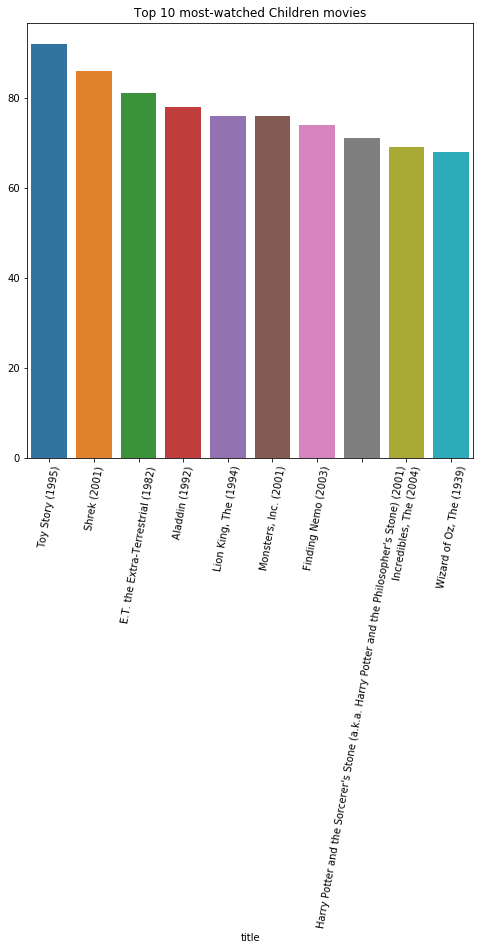

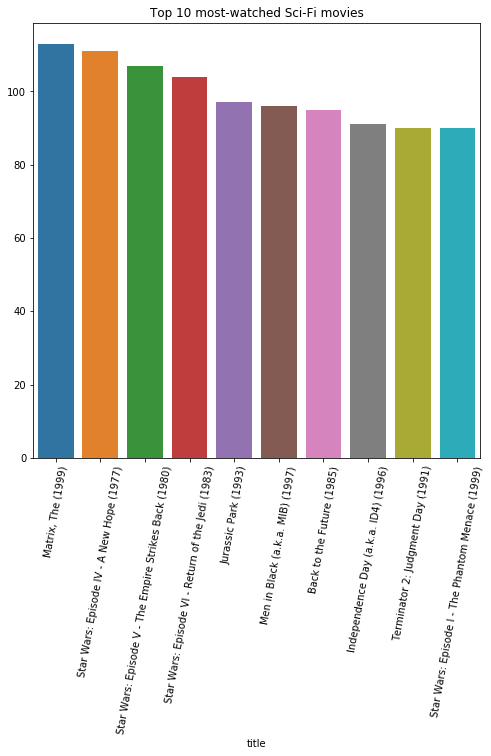

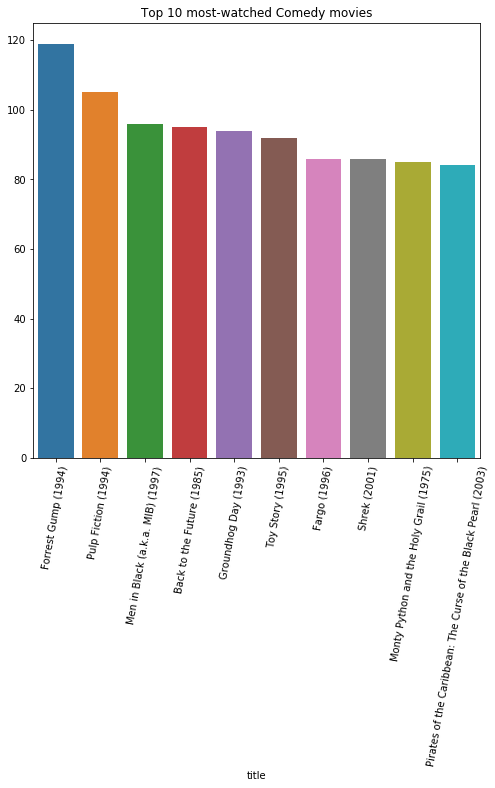

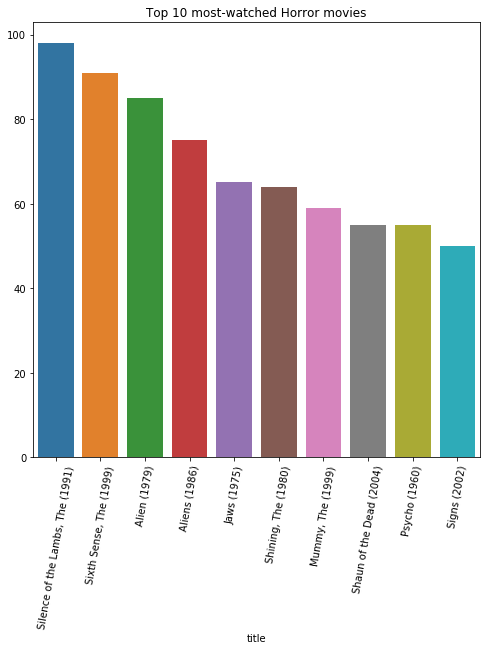

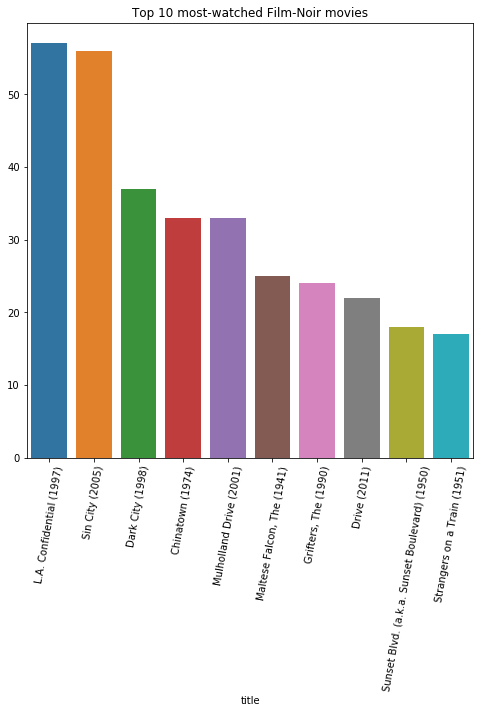

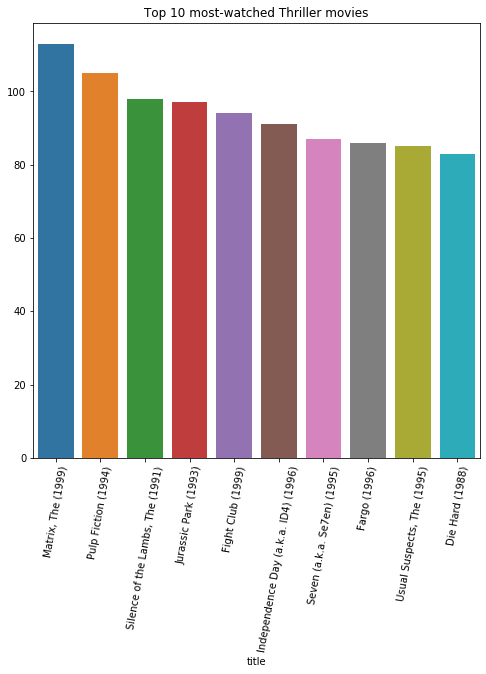

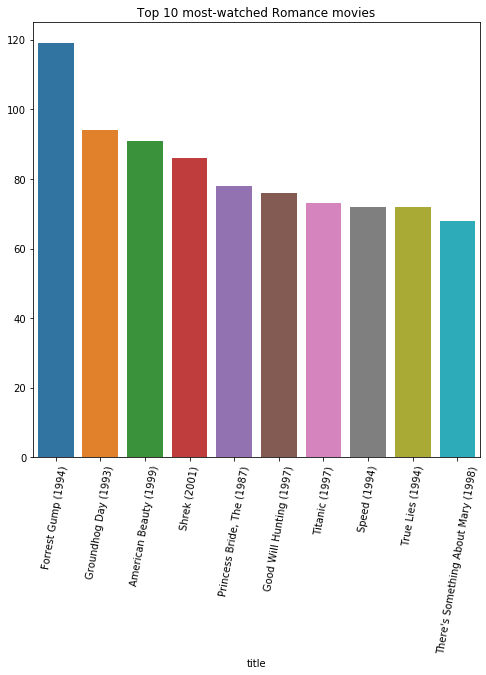

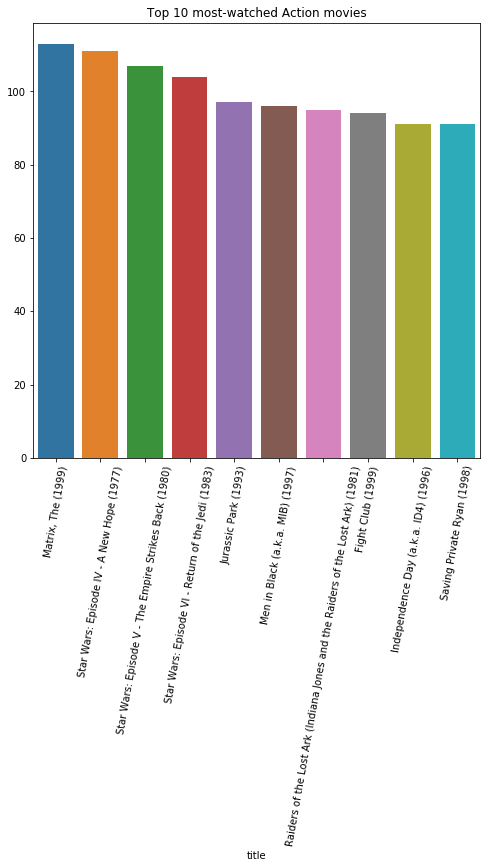

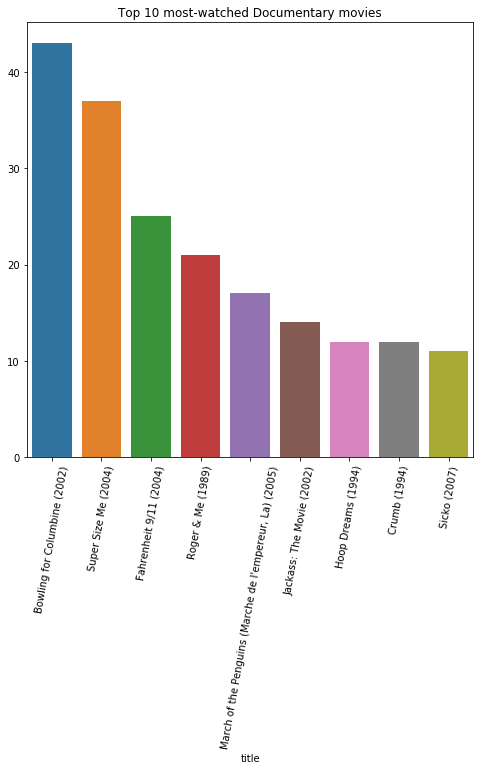

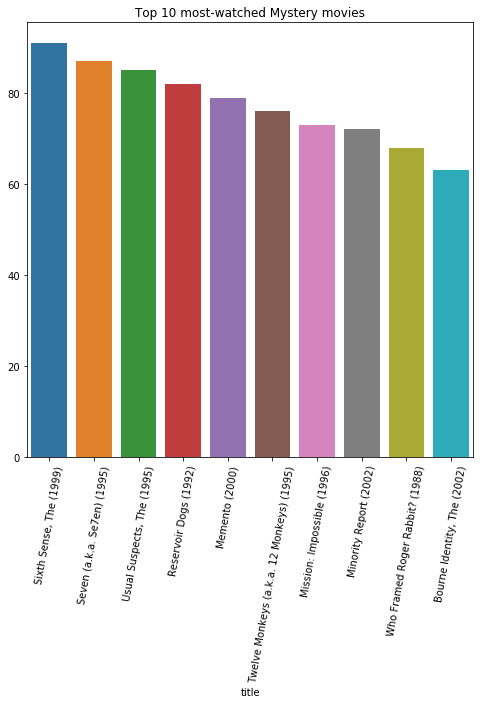

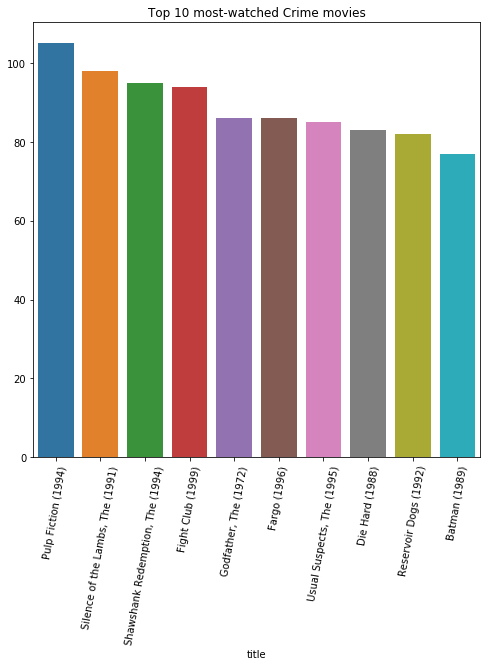

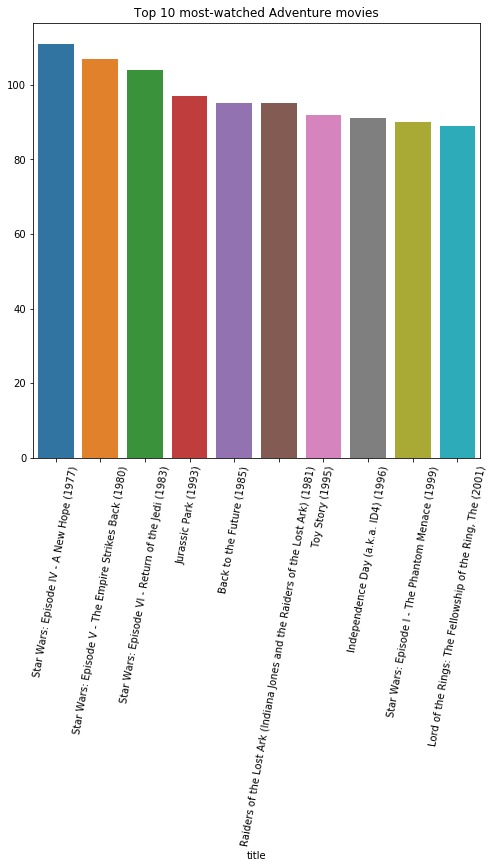

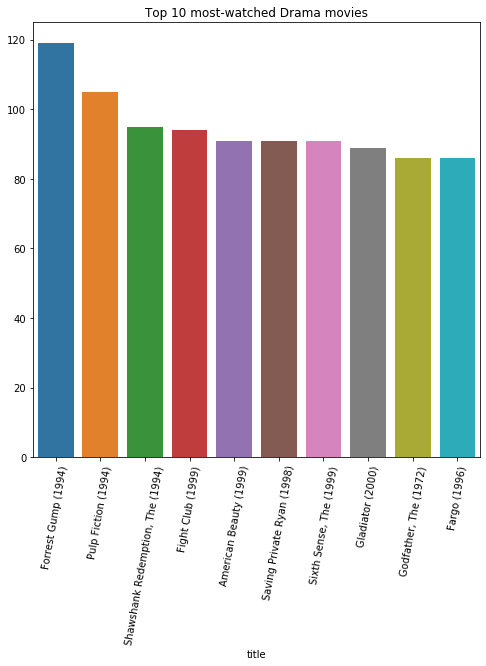

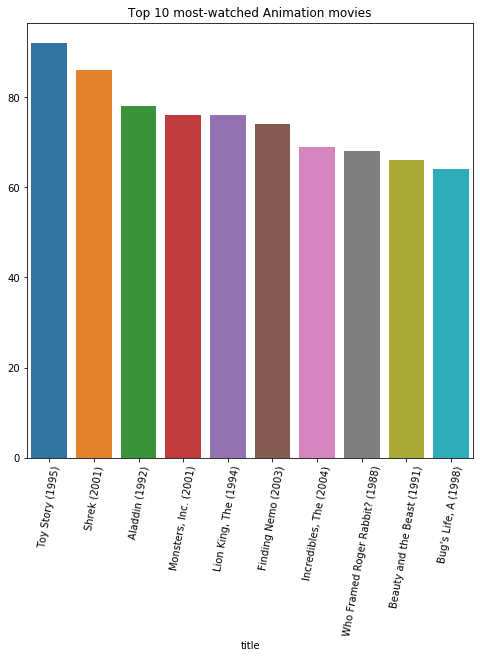

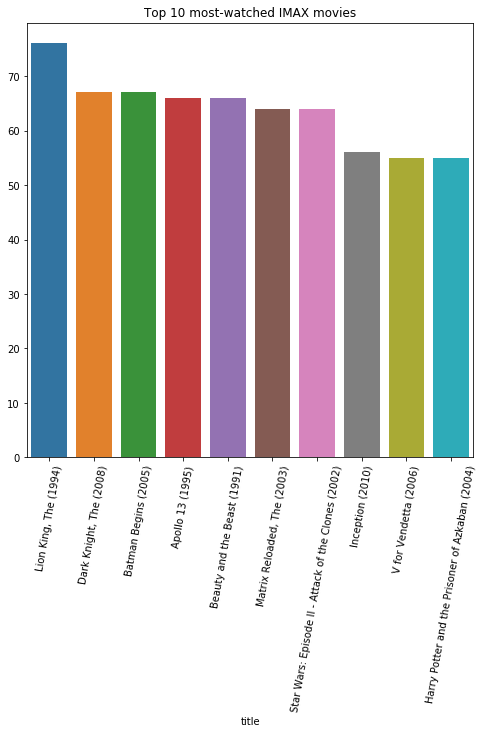

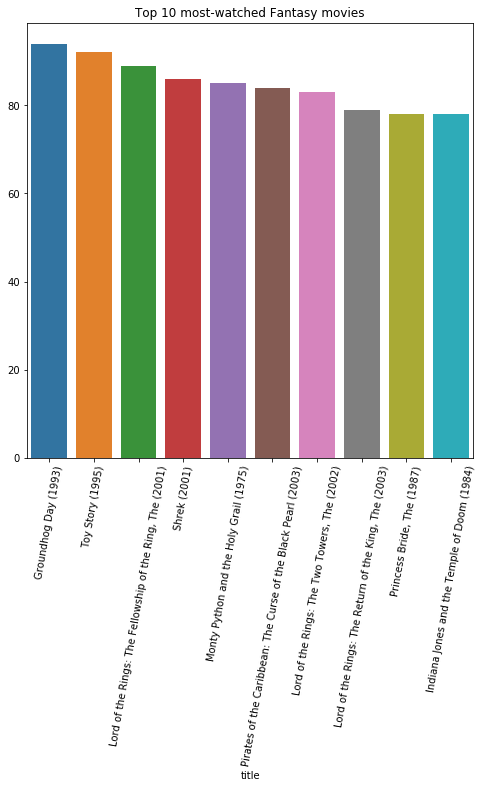

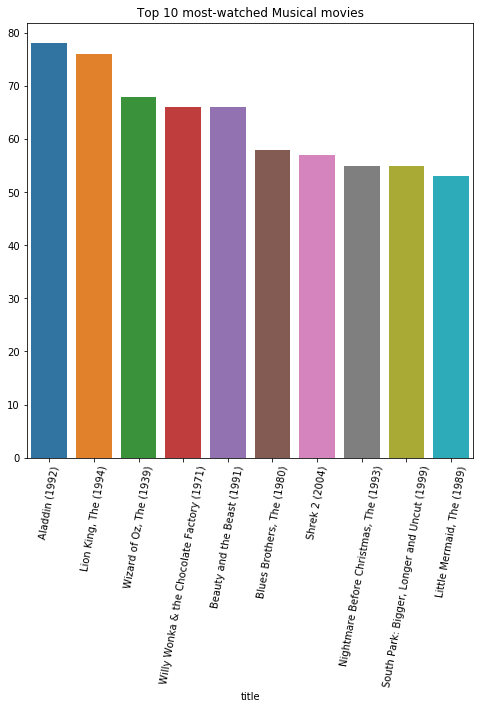

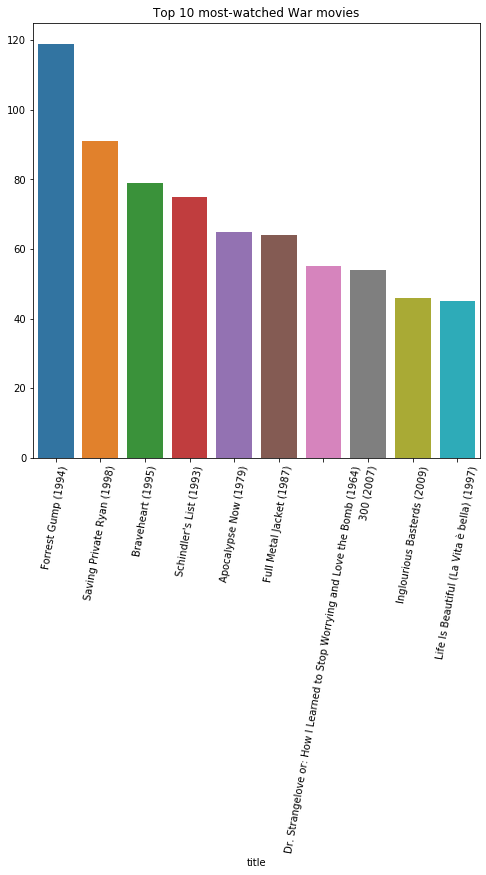

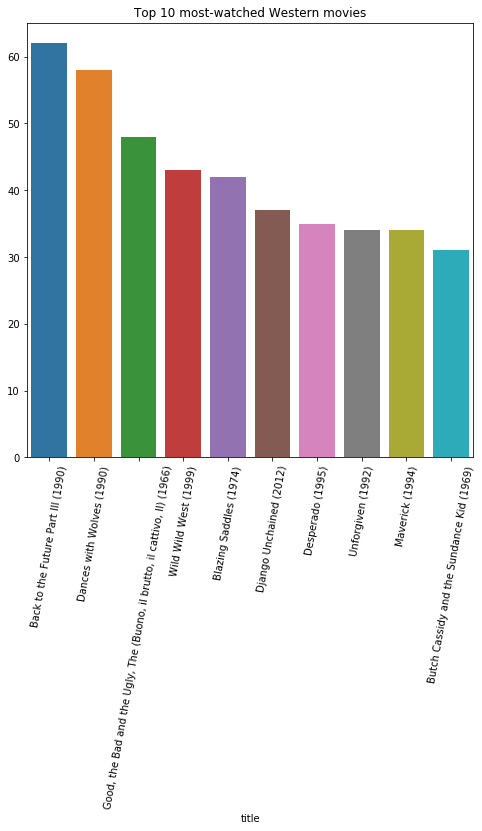

In [47]:
#Create a loop that will plot the top 10 most watched movies.  
for gen in matrix.columns[1:]:
    x = matrix[(matrix[gen]==True)]
    plt.figure(figsize=(8,8))
    topmovies = x.groupby('title').size().sort_values(ascending=False).head(10)
    sns.barplot(topmovies.index, topmovies.values)
    plt.title('Top 10 most-watched '+gen+' movies')
    plt.xticks(rotation=80);

In [80]:
#Looking at which movies are most popular in the fantasy genre
fantasy = data[(data['Fantasy']==True)]
fantasy.head(5)

,userId,movieId,rating,title,genres,year,Film-Noir,(no genres listed),Fantasy,Adventure,Western,Documentary,Children,Horror,Thriller,Action,Crime,Mystery,Sci-Fi,War,Drama,IMAX,Comedy,Romance,Animation,Musical
0,1,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,False,False,True,True,False,False,True,False,False,False,False,False,False,False,False,False,True,False,True,False
22,1,367,4.0,"Mask, The (1994)",Action|Comedy|Crime|Fantasy,1994,False,False,True,False,False,False,False,False,False,True,True,False,False,False,False,False,True,False,False,False
35,1,596,5.0,Pinocchio (1940),Animation|Children|Fantasy|Musical,1940,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,True
38,1,661,5.0,James and the Giant Peach (1996),Adventure|Animation|Children|Fantasy|Musical,1996,False,False,True,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,True
39,1,673,3.0,Space Jam (1996),Adventure|Animation|Children|Comedy|Fantasy|Sc...,1996,False,False,True,True,False,False,True,False,False,False,False,False,True,False,False,False,True,False,True,False


/Users/MZhang/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


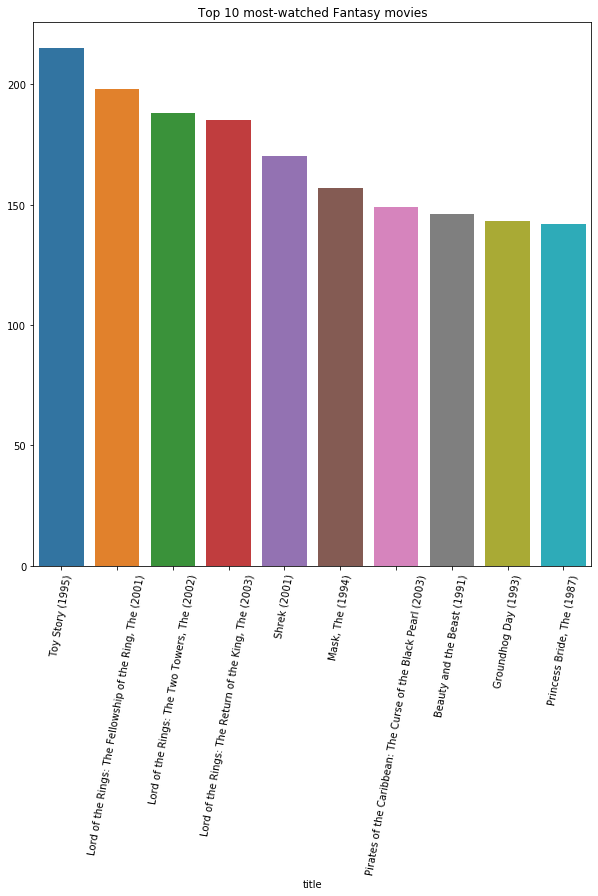

In [165]:
plt.figure(figsize=(10,10))
topmovies = fantasy.groupby('title').size().sort_values(ascending=False).head(10)
sns.barplot(topmovies.index, topmovies.values)
plt.title('Top 10 most-watched Fantasy movies')
plt.xticks(rotation=80);

/Users/MZhang/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


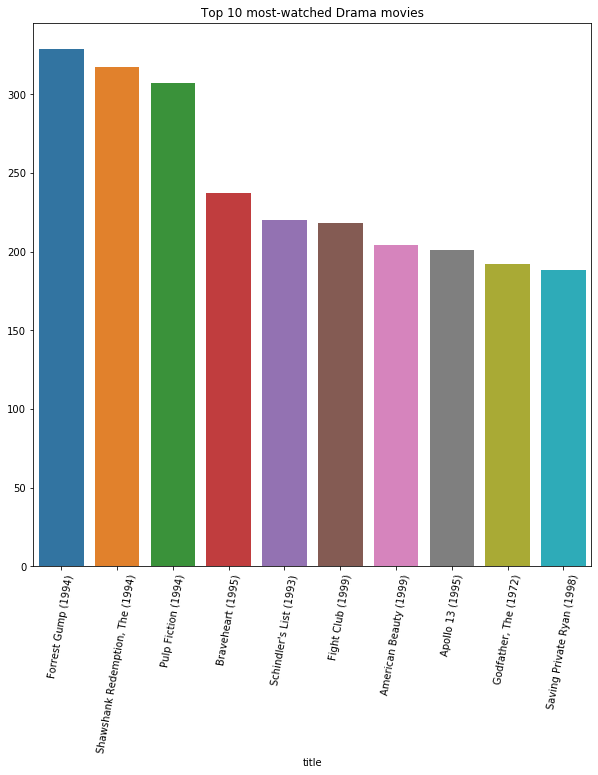

In [124]:
#Looking at which movies are most popular in the Drama genre
drama = data[(data['Drama']==True)]
plt.figure(figsize=(10,10))
topmovies = drama.groupby('title').size().sort_values(ascending=False).head(10)
sns.barplot(topmovies.index, topmovies.values)
plt.title('Top 10 most-watched Drama movies')
plt.xticks(rotation=80);

/Users/MZhang/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


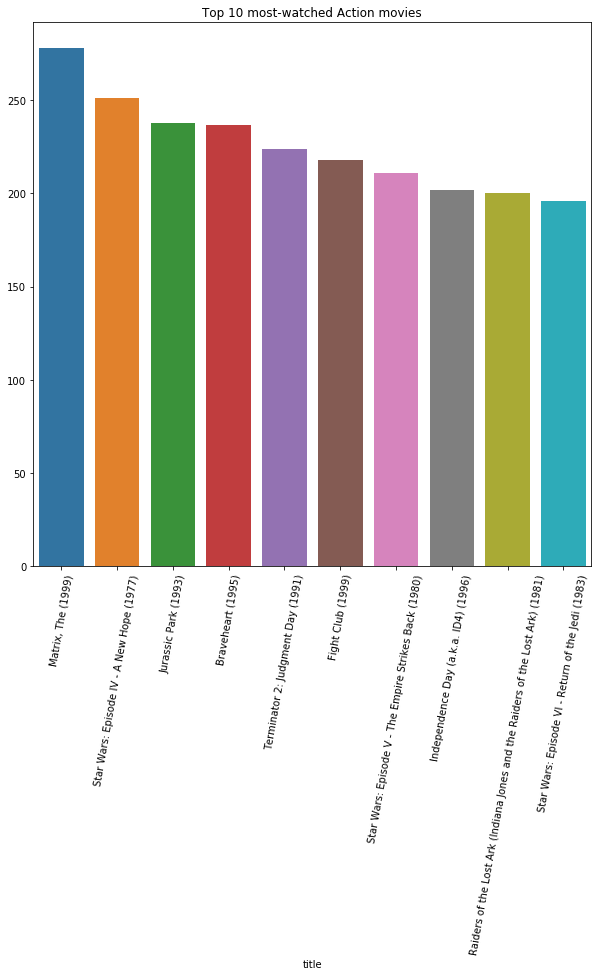

In [125]:
#Looking at which movies are most popular in the Action genre
action = data[(data['Action']==True)]
plt.figure(figsize=(10,10))
topmovies = action.groupby('title').size().sort_values(ascending=False).head(10)
sns.barplot(topmovies.index, topmovies.values)
plt.title('Top 10 most-watched Action movies')
plt.xticks(rotation=80);

/Users/MZhang/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


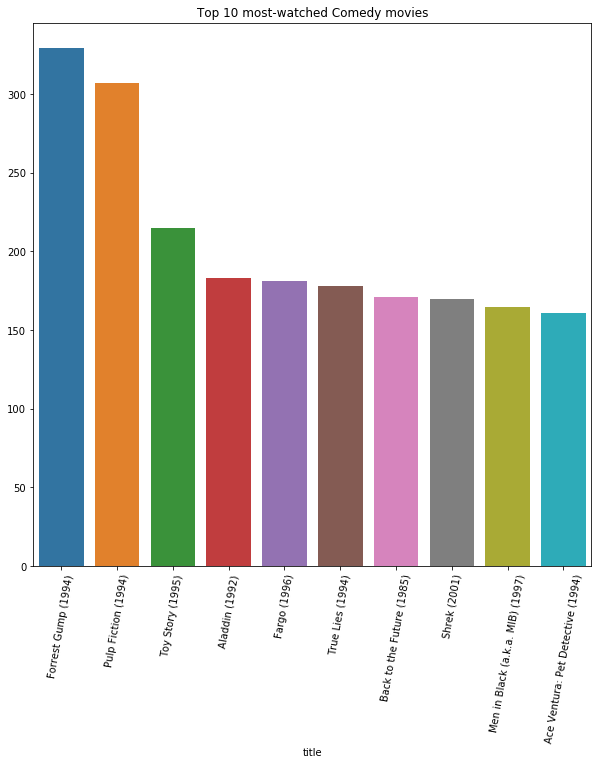

In [161]:
#Looking at which movies are most popular in the Comedy genre
comedy = data[(data['Comedy']==True)]
plt.figure(figsize=(10,10))
topmovies = comedy.groupby('title').size().sort_values(ascending=False).head(10)
sns.barplot(topmovies.index, topmovies.values)
plt.title('Top 10 most-watched Comedy movies')
plt.xticks(rotation=80);

/Users/MZhang/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


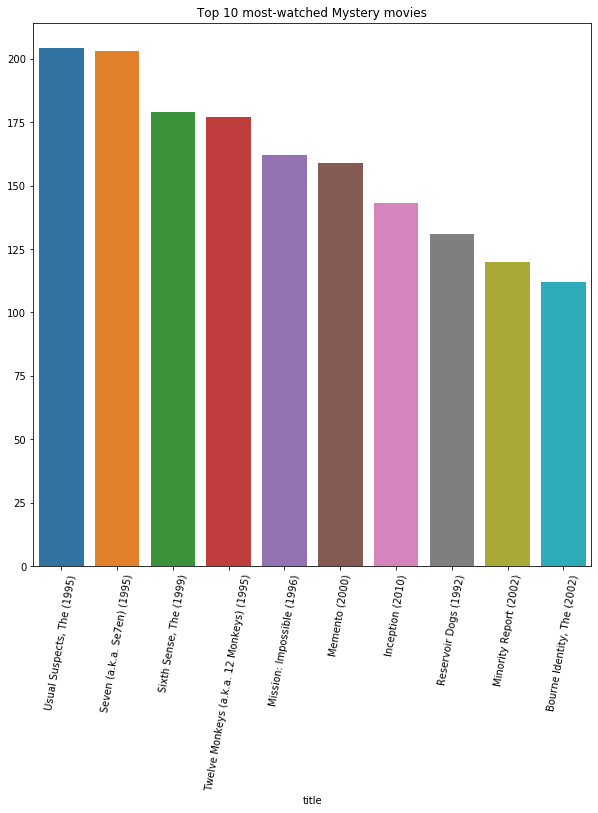

In [163]:
#Looking at which movies are most popular in the Mystery genre
mystery = data[(data['Mystery']==True)]
plt.figure(figsize=(10,10))
topmovies = mystery.groupby('title').size().sort_values(ascending=False).head(10)
sns.barplot(topmovies.index, topmovies.values)
plt.title('Top 10 most-watched Mystery movies')
plt.xticks(rotation=80);

In [57]:
data.to_csv('cleaneddata')

In [31]:
data.head()

,userId,movieId,rating,title,genres,year,Musical,IMAX,Documentary,Animation,Fantasy,Mystery,Crime,War,Children,Comedy,Film-Noir,Horror,Action,Adventure,Drama,(no genres listed),Sci-Fi,Thriller,Western,Romance
0,1,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,False,False,False,True,True,False,False,False,True,True,False,False,False,True,False,False,False,False,False,False
1,1,3,4.0,Grumpier Old Men (1995),Comedy|Romance,1995,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True
2,1,6,4.0,Heat (1995),Action|Crime|Thriller,1995,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,True,False,False
3,1,47,5.0,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,1995,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False
4,1,50,5.0,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,1995,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,True,False,False
